# Segmentación de Clientes - Análisis Refinado

En este notebook trabajaremos con una base de datos de facturación (invoice data) que contiene información sobre ventas, clientes y transacciones. Nuestro objetivo es realizar una segmentación de clientes basada en sus características, pero con un enfoque depurado para evitar que las categorías queden demasiado amontonadas.

### Columnas principales:
- **invoice_no:** Número de factura
- **customer_id:** Identificador del cliente
- **gender:** Género
- **age:** Edad del cliente
- **category:** Categoría del producto (Clothing, Shoes, Books, etc.)
- **quantity:** Cantidad comprada
- **price:** Precio unitario
- **payment_method:** Método de pago (Credit Card, Debit Card, Cash, etc.)
- **invoice_date:** Fecha de la factura
- **shopping_mall:** Centro comercial donde se realizó la compra

### Objetivos del Taller:

1. Explorar, limpiar y entender la base de datos.
2. Crear variables derivadas (por ejemplo, el valor total de la compra).
3. Reducir la cantidad de categorías (por ejemplo, agrupar aquellas con muy pocos registros) para lograr un análisis más claro.
4. Definir criterios de segmentación demográfica y comportamental.
5. Visualizar los segmentos usando la paleta corporativa.
6. Formular preguntas específicas para discutir implicaciones de marketing.

### Paleta Corporativa a Utilizar:
- Azul: `#0033A0`
- Naranja: `#FF6600`
- Blanco: `#FFFFFF`

¡Sigan cada paso y al final discutan qué implicaciones de marketing se derivan de cada segmento!

In [29]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip

--2025-10-20 00:31:57--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip [following]
--2025-10-20 00:31:58--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1712272 (1.6M) [application/zip]
Saving to: ‘customer_shopping_data.csv.zip.4’

c

In [28]:
!unzip customer_shopping_data.csv.zip

Archive:  customer_shopping_data.csv.zip
replace customer_shopping_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [30]:
# =============================================================================
# IMPORTS Y CONFIGURACIONES INICIALES
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Paleta corporativa
corporate_colors = ['#0033A0', '#FF6600', '#FFFFFF']

# Ajuste de estética con Seaborn
sns.set(style="whitegrid")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=corporate_colors)

print("Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.")

Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.


## 1. Carga y Vista Rápida del Dataset

Carguen la base de datos denominada `customer_shopping_data.csv`. Observen las dimensiones y las primeras filas para familiarizarse con la estructura de los datos.

In [31]:
df = pd.read_csv('customer_shopping_data.csv')

print("Dimensiones del DataFrame:")
print(df.shape)

print("\nVista rápida de los primeros registros:")
df.head()

Dimensiones del DataFrame:
(99457, 10)

Vista rápida de los primeros registros:


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


## 2. Análisis Exploratorio Inicial

Revisen la estructura, los tipos de datos y las estadísticas descriptivas del dataset.

**Pregunta para los estudiantes:** ¿Qué columnas consideran críticas para segmentar a los clientes y por qué?

In [32]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


Considero que las columnas más importantes para segmentar a los clientes son **edad, género, categoría, cantidad, precio, método de pago y centro comercial**, porque cada una aporta información clave sobre el comportamiento de compra. La **edad** y el **género** permiten identificar perfiles demográficos y posibles diferencias en las preferencias; la **categoría** muestra qué tipo de productos compra cada persona; la **cantidad** y el **precio** ayudan a distinguir entre clientes frecuentes o de alto valor; mientras que el **método de pago** y el **centro comercial** dan pistas sobre sus hábitos financieros y zonas donde más consumen. En conjunto, estas variables permiten entender mejor a los clientes y crear estrategias más efectivas de segmentación y fidelización.

## 3. Limpieza de Datos

Identifiquen y gestionen valores nulos y duplicados. Es esencial dejar la base limpia para un análisis confiable.

**Pregunta:** ¿Qué variables presentan problemas de calidad de datos y cómo los resolverían?

In [33]:
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64


Según el resultado que arrojó la limpieza de datos, ninguna de las variables presenta un problema de calidad, ya que toda la tabla salió en ceros. Por ende, todos los datos presentes nos sirven para realizar el análisis de calidad.

## 4. Creación de Variables Derivadas

Generen nuevas variables que puedan aportar a la segmentación. Por ejemplo, calculen el **valor total** de la factura (multiplicar `quantity` por `price`).

**Pregunta:** ¿Qué otras variables derivadas podrían ser útiles para analizar el comportamiento de compra?

In [34]:
df['ValorTotal'] = df.quantity * df.price
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,ValorTotal
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40


Yo pondría una columna más donde se pueda analizar la **frecuencia de compra por cliente**, ya que esto me ayudará a saber cuántos clientes estoy fidelizando y qué me falta para poder hacerlo. Además, una columna con la **categoría más comprada por cliente** para poder analizar las preferencias de consumo.

## 5. Visualización de Distribuciones

Visualicen la distribución de variables clave, como `age` y `total_value`, usando histogramas y boxplots. Usen la paleta corporativa en los gráficos.

**Pregunta:** ¿Detectan patrones o valores atípicos que requieran atención?

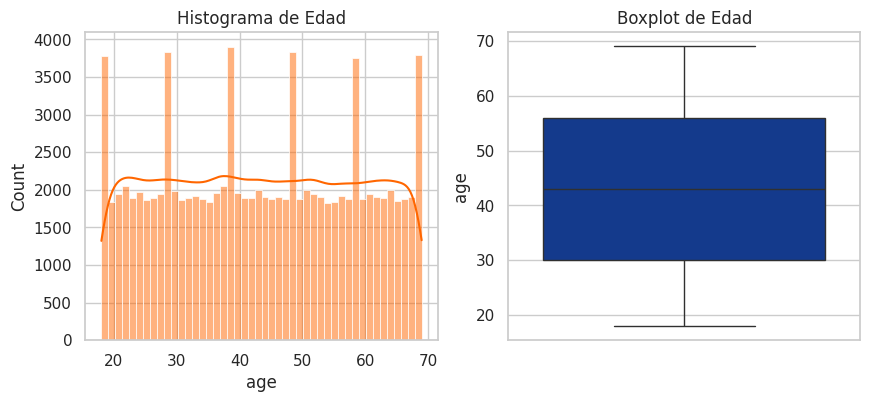

In [35]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(df['age'], kde=True, color=corporate_colors[1])
plt.title(f'Histograma de Edad')

plt.subplot(1,2,2)
sns.boxplot(y=df['age'], color=corporate_colors[0])
plt.title(f'Boxplot de Edad')

plt.show()

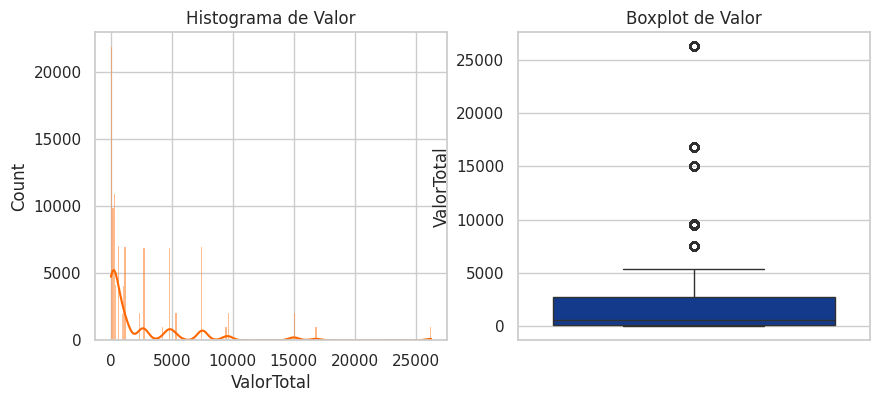

In [36]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(df['ValorTotal'], kde=True, color=corporate_colors[1])
plt.title(f'Histograma de Valor')

plt.subplot(1,2,2)
sns.boxplot(y=df['ValorTotal'], color=corporate_colors[0])
plt.title(f'Boxplot de Valor')

plt.show()

Al observar los gráficos de edad y valor total, noto que la variable edad presenta una distribución bastante uniforme, sin valores extremos o atípicos que llamen especialmente la atención. Esto indica que los clientes están distribuidos de manera equilibrada entre los diferentes rangos de edad, lo cual puede ser útil para diseñar estrategias de marketing más amplias. En cambio, en la variable ValorTotal sí se evidencian valores atípicos significativos, como se observa en el boxplot, donde algunos clientes presentan montos de compra mucho más altos que la mayoría. Estos casos podrían corresponder a compradores frecuentes o con un ticket promedio elevado, y sería importante analizarlos más a fondo para identificar si representan oportunidades de fidelización o si distorsionan los promedios generales del análisis.

## 6. Definición de Criterios de Segmentación Demográfica

Segmenten a los clientes en función de variables demográficas, por ejemplo, agrupando la edad en categorías (Jóvenes, Adultos, Mayores) y analizando el género.

**Pregunta:** ¿Cómo segmentarían a los clientes en función de la edad y el género para dirigir campañas específicas?

In [37]:
bins_edad = [0, 35, 55, 120]
labels_edad = ['Joven', 'Adulto', 'Mayor']
df['Segmento_Edad'] = pd.cut(df['age'], bins=bins_edad, labels=labels_edad)

df["Segmento_Edad"].value_counts()

,count
Segmento_Edad,
Adulto,38452
Joven,34418
Mayor,26587


Ya con la segmentación de edad realizada (jóvenes, adultos y mayores), complementaría el análisis incluyendo la variable género, para identificar patrones de compra diferenciados entre hombres y mujeres dentro de cada grupo etario. Por ejemplo, se podrían detectar si las mujeres jóvenes compran más productos de moda o cuidado personal, mientras que los hombres adultos podrían tener una mayor participación en categorías como tecnología o calzado.

## 7. Definición de Criterios de Segmentación Comportamental

Segmenten a los clientes según su comportamiento de compra. Revisen variables como `category`, `payment_method` y `shopping_mall`.

**Pregunta:** ¿Qué comportamiento de compra (categoría, método de pago, centro comercial) consideran de mayor impacto para la estrategia de marketing? ¿Por qué?

Distribution Categories:


,count
category,
Clothing,34487
Cosmetics,15097
Food & Beverage,14776
Toys,10087
Shoes,10034
Souvenir,4999
Technology,4996
Books,4981


/tmp/ipython-input-628043377.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='category', palette=corporate_colors[:2])
/tmp/ipython-input-628043377.py:5: UserWarning: 
The palette list has fewer values (2) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x='category', palette=corporate_colors[:2])


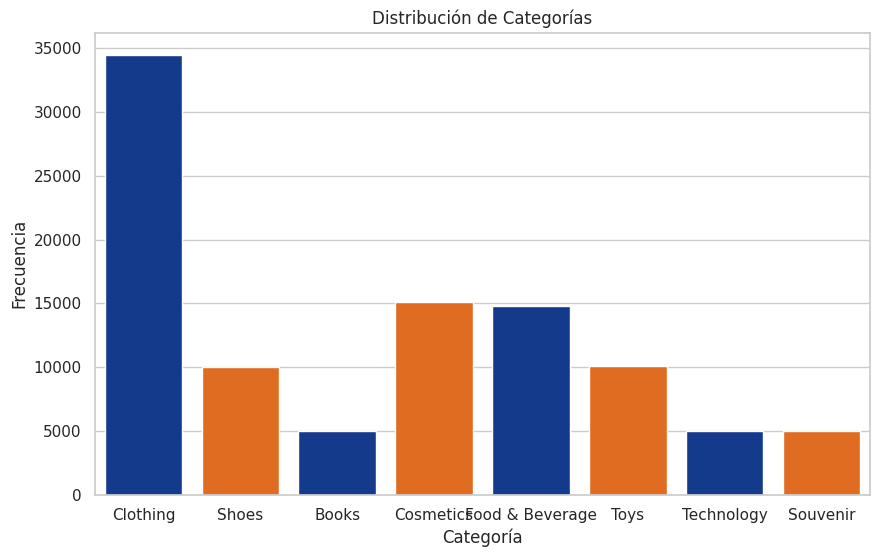

Distribution Payment Methods:


,count
payment_method,
Cash,44447
Credit Card,34931
Debit Card,20079


/tmp/ipython-input-628043377.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='payment_method', palette=corporate_colors[:2])
/tmp/ipython-input-628043377.py:16: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x='payment_method', palette=corporate_colors[:2])


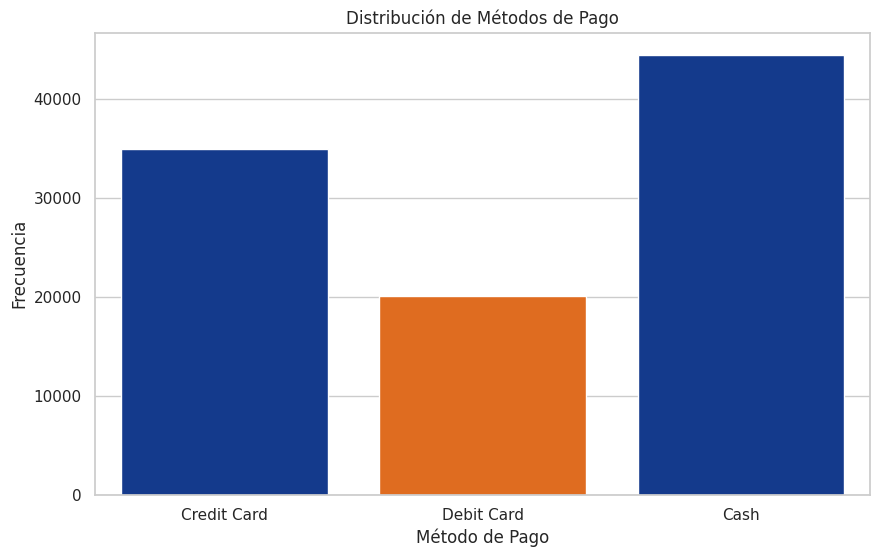

Distribution Shopping Malls:


,count
shopping_mall,
Mall of Istanbul,19943
Kanyon,19823
Metrocity,15011
Metropol AVM,10161
Istinye Park,9781
Zorlu Center,5075
Cevahir AVM,4991
Forum Istanbul,4947
Viaport Outlet,4914


/tmp/ipython-input-628043377.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='shopping_mall', palette=corporate_colors[:2])
/tmp/ipython-input-628043377.py:26: UserWarning: 
The palette list has fewer values (2) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x='shopping_mall', palette=corporate_colors[:2])


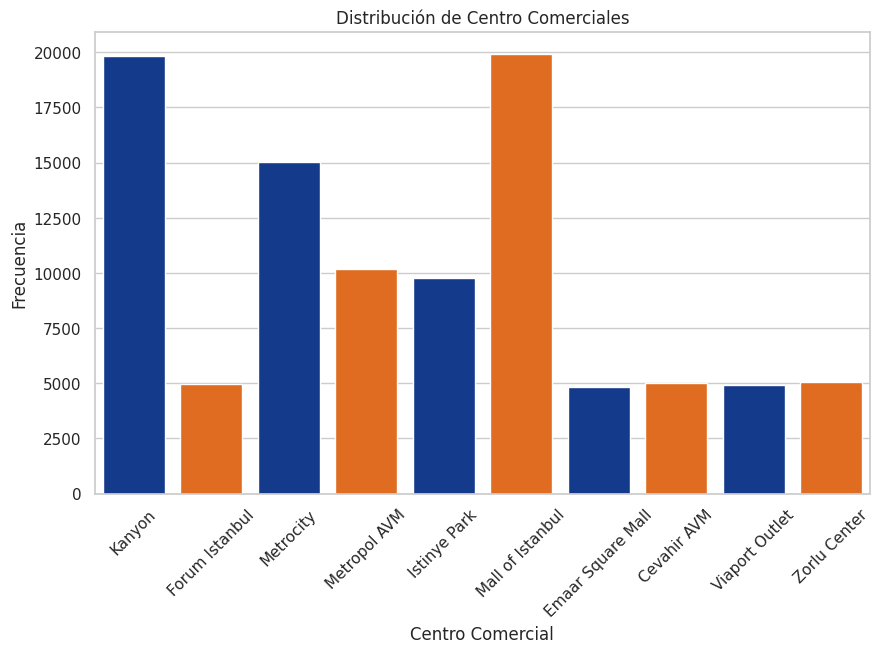

In [38]:
print ("Distribution Categories:")
display (df['category'].value_counts())

plt.figure(figsize=(10,6 ))
sns.countplot(data=df, x='category', palette=corporate_colors[:2])
plt.title('Distribución de Categorías')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.show()


print ("Distribution Payment Methods:")
display (df['payment_method'].value_counts())

plt.figure(figsize=(10,6 ))
sns.countplot(data=df, x='payment_method', palette=corporate_colors[:2])
plt.title('Distribución de Métodos de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Frecuencia')
plt.show()

print ("Distribution Shopping Malls:")
display (df['shopping_mall'].value_counts())

plt.figure(figsize=(10,6 ))
sns.countplot(data=df, x='shopping_mall', palette=corporate_colors[:2])
plt.title('Distribución de Centro Comerciales')
plt.xlabel('Centro Comercial')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

Basándome en las variables **category**, **payment_method** y **shopping_mall**, considero que el comportamiento de compra con mayor impacto para la estrategia de marketing es el relacionado con la **categoría de productos**, especialmente **Clothing** y **Cosmetics**, ya que concentran la mayor cantidad de transacciones y reflejan intereses más consistentes entre los distintos segmentos de edad.

## 8. Visualizaciones Comparativas de Segmentos

Crucen variables demográficas y comportamentales para identificar relaciones relevantes. Por ejemplo, comparen el grupo de edad con la categoría de producto.

**Pregunta:** ¿Qué relaciones entre estas variables podrían definir segmentos de alto valor?

Tabla cruzada (Edad vs Categoria):
category       Books  Clothing  Cosmetics  Food & Beverage  Shoes  Souvenir  \
Segmento_Edad                                                                 
Joven           1708     11951       5171             5126   3478      1738   
Adulto          1921     13320       5868             5715   3880      1894   
Mayor           1352      9216       4058             3935   2676      1367   

category       Technology  Toys  
Segmento_Edad                    
Joven                1713  3533  
Adulto               1982  3872  
Mayor                1301  2682  


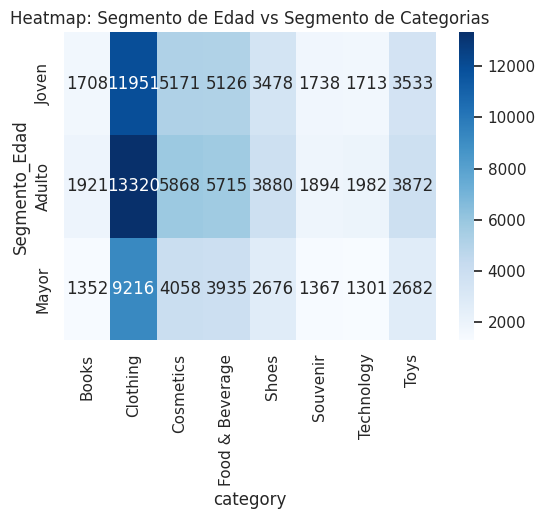

In [39]:
tabla_segmentos = pd.crosstab(df['Segmento_Edad'], df['category'])
print("Tabla cruzada (Edad vs Categoria):")
print(tabla_segmentos)

plt.figure(figsize=(6,4))
sns.heatmap(tabla_segmentos, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap: Segmento de Edad vs Segmento de Categorias')
plt.show()

Al analizar la relación entre la edad y las categorías de compra, se observa que el grupo adulto concentra la mayor cantidad de compras, especialmente en ropa (Clothing) y cosméticos (Cosmetics), lo que sugiere un poder adquisitivo más alto y una mayor disposición a gastar en productos de uso personal y estilo de vida. Los jóvenes, aunque también muestran un consumo relevante en ropa, destacan más en juguetes (Toys) y tecnología (Technology), lo que puede reflejar intereses más recreativos o de tendencia. Por otro lado, los mayores tienen menor participación general, pero mantienen cierta presencia en categorías como ropa y alimentos y bebidas (Food & Beverage). Con base en esto, los segmentos de adultos compradores de ropa y cosméticos podrían considerarse de alto valor, ya que agrupan mayor volumen de compras y categorías con alto margen comercial, siendo ideales para estrategias de fidelización o campañas premium.

## 9. Reducción y Agrupación de Categorías

Si encuentran que hay demasiadas categorías o que algunas tienen muy pocos registros, agrupen aquellas que sean similares o con bajo volumen para evitar análisis amontonados.

**Ejemplo:** Si hay muchas categorías de tecnología o juguetes con pocos registros, podrían agruparlas en "Otros" o "Tecnología/Entretenimiento".

**Pregunta:** ¿Qué categorías agruparían y por qué?

Conteo de categorías después de la agrupación:
category_reducida
Clothing           34487
Cosmetics          15097
Others             14976
Food & Beverage    14776
Toys               10087
Shoes              10034
Name: count, dtype: int64


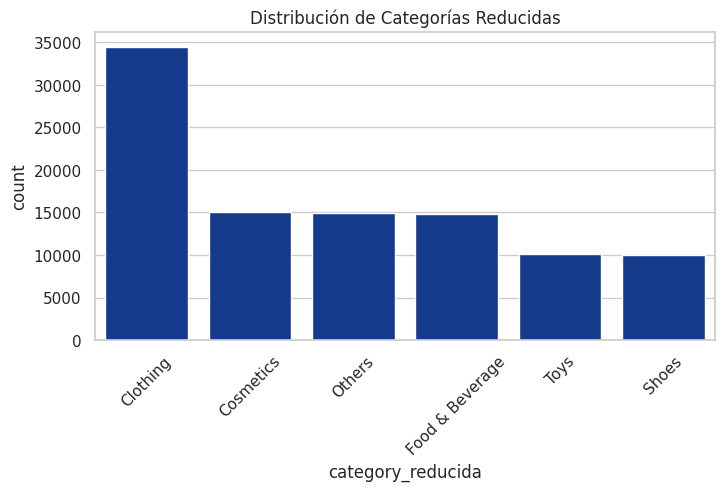

In [48]:
# Agrupar categorías con bajo volumen en una nueva categoría "Otros"
df['category_reducida'] = df['category'].replace({
    'Technology': 'Others',
    'Souvenir': 'Others',
    'Books': 'Others'
})

# Verificar el cambio
print("Conteo de categorías después de la agrupación:")
print(df['category_reducida'].value_counts())

# (Opcional) Visualizar para comprobar el impacto
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.countplot(x='category_reducida', data=df, order=df['category_reducida'].value_counts().index)
plt.title('Distribución de Categorías Reducidas')
plt.xticks(rotation=45)
plt.show()

Al analizar la distribución de las categorías por segmento de edad, noté que Technology, Souvenir y Books tienen un volumen de registros mucho menor comparado con categorías como Clothing o Cosmetics, que concentran la mayoría de las compras. Por esta razón, considero que sería conveniente agrupar Technology, Souvenir y Books dentro de una sola categoría llamada “Otros”, ya que representan productos de compra menos frecuente o más específica.

## 10. Creación de Segmentación Manual Combinada

Combinen criterios demográficos (por ejemplo, grupo de edad) y comportamentales (por ejemplo, categoría reducida y shopping mall) para formar un único segmento combinado.

**Pregunta:** ¿Qué combinación de variables creen que ofrece el perfil más completo para orientar estrategias de marketing?

Cantidad de registros por segmento combinado (Edad + Categoría Reducida) ordenados por categoría:
             Segmento_Comb  Cantidad        Categoria
0          Adulto_Clothing     13320         Clothing
1           Joven_Clothing     11951         Clothing
2           Mayor_Clothing      9216         Clothing
3         Adulto_Cosmetics      5868        Cosmetics
9          Mayor_Cosmetics      4058        Cosmetics
6          Joven_Cosmetics      5171        Cosmetics
11   Mayor_Food & Beverage      3935  Food & Beverage
8    Joven_Food & Beverage      5126  Food & Beverage
5   Adulto_Food & Beverage      5715  Food & Beverage
10            Mayor_Others      4020           Others
4            Adulto_Others      5797           Others
7             Joven_Others      5159           Others
12            Adulto_Shoes      3880            Shoes
15             Joven_Shoes      3478            Shoes
17             Mayor_Shoes      2676            Shoes
16              Mayor_Toys      2682  

/tmp/ipython-input-2600155292.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segmento_Comb', y='Cantidad', data=seg_counts, palette='viridis')


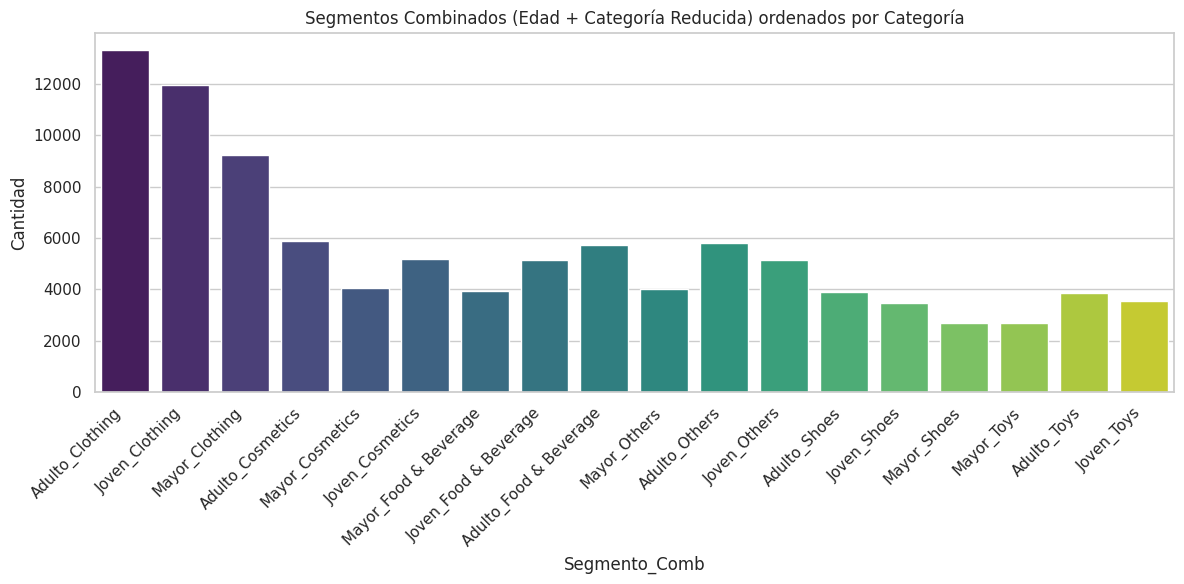

In [52]:
# Definir la función para combinar Segmento_Edad con category_reducida
def asignar_segmento(row):
    return f"{row['Segmento_Edad']}_{row['category_reducida']}"

# Crear la nueva columna con el segmento combinado
df['Segmento_Comb'] = df.apply(asignar_segmento, axis=1)

# Contar los registros por cada combinación
seg_counts = df['Segmento_Comb'].value_counts().reset_index()
seg_counts.columns = ['Segmento_Comb', 'Cantidad']

# Extraer la categoría (después del guion bajo) para ordenar
seg_counts['Categoria'] = seg_counts['Segmento_Comb'].apply(lambda x: x.split('_')[1])

# Ordenar alfabéticamente por la categoría
seg_counts = seg_counts.sort_values(by='Categoria')

# Mostrar todos los resultados
print("Cantidad de registros por segmento combinado (Edad + Categoría Reducida) ordenados por categoría:")
print(seg_counts)

# Graficar
plt.figure(figsize=(12,6))
sns.barplot(x='Segmento_Comb', y='Cantidad', data=seg_counts, palette='viridis')
plt.title('Segmentos Combinados (Edad + Categoría Reducida) ordenados por Categoría')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## 11. Análisis Final de los Grupos Resultantes

Analicen cómo se comportan los segmentos combinados en relación al **valor total de compra**. Identifiquen cuáles tienen un alto valor promedio y discutan sus implicaciones para la estrategia de marketing.

**Pregunta:** ¿Qué segmento destaca por tener un alto valor total y qué estrategias sugerirían para potenciarlo?

Gasto promedio por Segmento Combinado (Edad + Categoría Reducida):
             Segmento_Comb  Gasto_Promedio
0          Adulto_Clothing     3324.850354
1         Adulto_Cosmetics      450.294949
2   Adulto_Food & Beverage       57.680997
3            Adulto_Others     4089.004099
4             Adulto_Shoes     6682.459838
5              Adulto_Toys      390.778182
6           Joven_Clothing     3276.976046
7          Joven_Cosmetics      450.955649
8    Joven_Food & Beverage       57.501432
9             Joven_Others     3814.355350
10             Joven_Shoes     6652.603174
11              Joven_Toys      394.037113
12          Mayor_Clothing     3314.522960
13         Mayor_Cosmetics      448.161774
14   Mayor_Food & Beverage       57.213675
15            Mayor_Others     3967.788940
16             Mayor_Shoes     6535.034925
17              Mayor_Toys      400.894855


/tmp/ipython-input-2575224589.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segmento_Comb', y='Gasto_Promedio', data=promedio_segmentos, palette='crest')


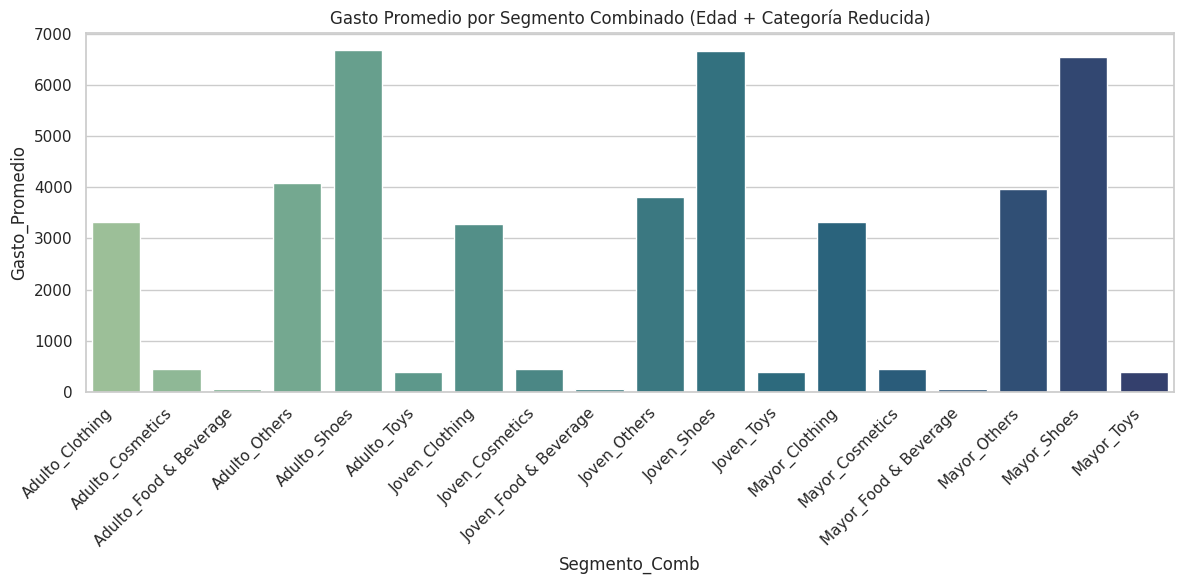

In [54]:
# Calcular el valor promedio de compra por cada segmento combinado
promedio_segmentos = df.groupby('Segmento_Comb')['ValorTotal'].mean().reset_index()

# Renombrar las columnas para mayor claridad
promedio_segmentos.columns = ['Segmento_Comb', 'Gasto_Promedio']

# Mostrar la tabla completa (sin truncar)
print("Gasto promedio por Segmento Combinado (Edad + Categoría Reducida):")
print(promedio_segmentos)

# Graficar
plt.figure(figsize=(12,6))
sns.barplot(x='Segmento_Comb', y='Gasto_Promedio', data=promedio_segmentos, palette='crest')
plt.title('Gasto Promedio por Segmento Combinado (Edad + Categoría Reducida)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Al analizar la gráfica, se observa que los segmentos “Adulto_Shoes”, “Joven_Shoes” y “Mayor_Shoes” destacan por tener los valores promedio de gasto más altos. Esto indica que tanto adultos como jóvenes y mayores muestran una fuerte disposición a invertir en calzado, posiblemente por motivos de estilo, tendencia o necesidad frecuente de renovación. Este comportamiento sugiere que la categoría de “Shoes” tiene un alto potencial comercial.

Como estrategia de marketing, sería recomendable fortalecer las campañas dirigidas a estos segmentos, utilizando mensajes centrados en la moda, comodidad y exclusividad del producto. Además, podrían implementarse promociones por temporadas o programas de fidelización para incentivar compras recurrentes. Reforzar la presencia de estos productos en centros comerciales con alto tráfico o a través de plataformas digitales también ayudaría a maximizar las ventas dentro de este grupo de alto valor.

## 12. Recomendaciones de Marketing

Con base en el análisis de los segmentos, respondan las siguientes preguntas:

- ¿Qué segmentos tienen mayor potencial en términos de valor y frecuencia de compra?
- ¿Qué estrategias de marketing implementarían para segmentos con bajo valor promedio?
- ¿Cómo influye la categoría de producto (tras la reducción) y el centro comercial en el comportamiento de compra?

Escriban sus respuestas en una celda Markdown o en un documento complementario, justificando cada estrategia.

Al observar los resultados de los segmentos combinados, se evidencia que los grupos con mayor potencial en términos de valor y frecuencia de compra son “Adulto_Shoes” y “Joven_Shoes”, ya que presentan los gastos promedio más altos. Esto sugiere que el calzado es una categoría clave que conecta tanto con adultos como con jóvenes, probablemente por su valor funcional y estético. Además, los adultos también muestran un gasto considerable en la categoría “Others”, lo que puede representar compras variadas o impulsivas.

En contraste, los segmentos con bajo valor promedio, como “Food & Beverage” y “Cosmetics”, podrían beneficiarse de estrategias que incentiven la compra por volumen o la recurrencia, como descuentos, combos o programas de puntos. También sería útil fortalecer la presencia visual en tiendas y redes sociales para captar la atención de compradores jóvenes.

Finalmente, la categoría de producto y el centro comercial influyen directamente en el comportamiento de compra: ciertos malls, como Kanyon o Forum Istanbul, pueden atraer públicos con mayor poder adquisitivo, lo que eleva el gasto promedio en categorías como calzado y ropa. En cambio, centros con mayor flujo de jóvenes o familias podrían impulsar más compras en categorías cotidianas o de entretenimiento. Esto demuestra que adaptar las estrategias de marketing según el tipo de producto y el entorno comercial es clave para optimizar las ventas y fidelizar clientes.

## 13. Toma de Decisiones y Conclusiones

Finalmente, el equipo de marketing debe decidir:

- ¿Cuántos segmentos son óptimos para la estrategia de la empresa?
- ¿Cómo asignar el presupuesto de marketing entre estos segmentos?
- ¿Qué indicadores se utilizarán para medir el éxito de las campañas en cada segmento?

**Actividad Final:**

1. Seleccionen el segmento con mayor potencial en términos de valor y frecuencia de compra.
2. Propongan una estrategia específica (campañas, promociones, ofertas personalizadas) para ese segmento.
3. Justifiquen su elección y expliquen cómo monitorizarán el desempeño de la campaña.

¡Discútanlo en grupo y compartan sus conclusiones!